In [122]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [123]:
#Import Data
df = pd.read_excel("import.xlsx")
display(df)

df_group_name = pd.read_excel("group_name.xlsx")#มีการ import data มาเพิ่มเพื่อจะได้รู้ว่าสินค้ากลุ่มนั้นคืออะไร
display(df_group_name)

,Code,Product label,Imported value in 2002,Imported value in 2003,Imported value in 2004,Imported value in 2005,Imported value in 2006,Imported value in 2007,Imported value in 2008,Imported value in 2009,...,Imported value in 2012,Imported value in 2013,Imported value in 2014,Imported value in 2015,Imported value in 2016,Imported value in 2017,Imported value in 2018,Imported value in 2019,Imported value in 2020,Imported value in 2021
0,0101,"Live horses, asses, mules and hinnies",123,489,808,940,987,1255,2420,2270,...,2603,2773,4015,3523,2345,4484,4727,3592,1311,1067
1,0102,Live bovine animals,17422,10590,15500,15627,8281,3523,4279,2809,...,13740,33133,67564,66619,58054,64005,76182,55497,42366,11621
2,0103,Live swine,0,473,557,780,564,138,469,76,...,2816,1181,1327,920,1257,3982,856,2967,2614,2563
3,0104,Live sheep and goats,2,189,1265,147,82,198,179,0,...,928,822,137,196,306,771,1898,1978,4365,3562
4,0105,"""Live poultry, """"fowls of the species Gallus d...",540,11767,13874,18915,14858,13629,14218,17411,...,20685,24140,26809,22699,24744,25324,24076,25617,25800,26614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9704,"Postage or revenue stamps, stamp-postmarks, fi...",4,18,13,31,38,1979,937,259,...,17,247,25,13,1078,90,805,67,54,21
1255,9705,Collections and collector's pieces of zoologic...,4,15,31,117,56,311,672,595,...,50,42,3291,44,52,66,86,162,51,120
1256,9706,Antiques of > 100 years old,13,0,12,2,2,5308,395,30,...,60,21647,225,102,1,58169,3720,50850,29,138
1257,9999,Commodities not elsewhere specified,542675,840880,909596,1381240,1273602,1005749,557,815,...,0,0,0,0,0,0,0,0,0,0


,Code,Product label
0,01,Live animals
1,02,Meat and edible meat offal
2,03,"Fish and crustaceans, molluscs and other aquat..."
3,04,Dairy produce; birds' eggs; natural honey; edi...
4,05,"Products of animal origin, not elsewhere speci..."
...,...,...
93,95,"Toys, games and sports requisites; parts and a..."
94,96,Miscellaneous manufactured articles
95,97,"Works of art, collectors' pieces and antiques"
96,99,Commodities not elsewhere specified


In [124]:
#Clean Data
missing = df.isna().sum() 
display(missing)

Code                      0
Product label             0
Imported value in 2002    0
Imported value in 2003    0
Imported value in 2004    0
Imported value in 2005    0
Imported value in 2006    0
Imported value in 2007    0
Imported value in 2008    0
Imported value in 2009    0
Imported value in 2010    0
Imported value in 2011    0
Imported value in 2012    0
Imported value in 2013    0
Imported value in 2014    0
Imported value in 2015    0
Imported value in 2016    0
Imported value in 2017    0
Imported value in 2018    0
Imported value in 2019    0
Imported value in 2020    0
Imported value in 2021    0
dtype: int64

In [125]:
#จัดการเปลี่ยนหัวตารางของข้อมูลมูลค่าให้อยู่ในรูปปี 2002 - 2021
df_value = df
lst2 = [str(x) for x in range(2002,2022)]
df_value.columns = ['Code','Product label']+lst2
display(df_value)

,Code,Product label,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0101,"Live horses, asses, mules and hinnies",123,489,808,940,987,1255,2420,2270,...,2603,2773,4015,3523,2345,4484,4727,3592,1311,1067
1,0102,Live bovine animals,17422,10590,15500,15627,8281,3523,4279,2809,...,13740,33133,67564,66619,58054,64005,76182,55497,42366,11621
2,0103,Live swine,0,473,557,780,564,138,469,76,...,2816,1181,1327,920,1257,3982,856,2967,2614,2563
3,0104,Live sheep and goats,2,189,1265,147,82,198,179,0,...,928,822,137,196,306,771,1898,1978,4365,3562
4,0105,"""Live poultry, """"fowls of the species Gallus d...",540,11767,13874,18915,14858,13629,14218,17411,...,20685,24140,26809,22699,24744,25324,24076,25617,25800,26614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9704,"Postage or revenue stamps, stamp-postmarks, fi...",4,18,13,31,38,1979,937,259,...,17,247,25,13,1078,90,805,67,54,21
1255,9705,Collections and collector's pieces of zoologic...,4,15,31,117,56,311,672,595,...,50,42,3291,44,52,66,86,162,51,120
1256,9706,Antiques of > 100 years old,13,0,12,2,2,5308,395,30,...,60,21647,225,102,1,58169,3720,50850,29,138
1257,9999,Commodities not elsewhere specified,542675,840880,909596,1381240,1273602,1005749,557,815,...,0,0,0,0,0,0,0,0,0,0


In [126]:
#ทำการปรับข้อมูลให้อยู่ในรูปของ ratio เพื่อง่ายต่อการเปรียบเทียบ
df_to_ratio1 = df
    
df_to_ratio1 = df_to_ratio1.sort_values(['Code'],ascending=True)
df_to_ratio1 = df_to_ratio1.drop(1258).reset_index(drop=True)
df_to_ratio1_drop = df_to_ratio1.drop(['Code','Product label'],axis = 1)

df_to_ratio2 = df_to_ratio1_drop.apply(lambda x: x/sum(x)*100, axis=0)

df_ratio = pd.concat( [df_to_ratio1, df_to_ratio2], ignore_index=True,axis=1  )

lst1 = [x for x in range(2,22)]

for i in lst1:
    df_ratio = df_ratio.drop(i,axis=1)

lst2 = [str(x) for x in range(2002,2022)]
df_ratio.columns = ['Code','Product label']+lst2
display(df_ratio)

,Code,Product label,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0101,"Live horses, asses, mules and hinnies",0.000190,0.000645,0.000856,0.000796,0.000768,0.000873,0.001341,0.001697,...,0.001051,0.001106,0.001761,0.001744,1.198248e-03,0.001993,0.001883,0.001496,0.000628,0.000397
1,0102,Live bovine animals,0.026950,0.013967,0.016419,0.013225,0.006440,0.002451,0.002372,0.002100,...,0.005550,0.013216,0.029642,0.032970,2.966444e-02,0.028447,0.030339,0.023110,0.020308,0.004318
2,0103,Live swine,0.000000,0.000624,0.000590,0.000660,0.000439,0.000096,0.000260,0.000057,...,0.001137,0.000471,0.000582,0.000455,6.423019e-04,0.001770,0.000341,0.001236,0.001253,0.000952
3,0104,Live sheep and goats,0.000003,0.000249,0.001340,0.000124,0.000064,0.000138,0.000099,0.000000,...,0.000375,0.000328,0.000060,0.000097,1.563599e-04,0.000343,0.000756,0.000824,0.002092,0.001324
4,0105,"""Live poultry, """"fowls of the species Gallus d...",0.000835,0.015519,0.014697,0.016007,0.011555,0.009480,0.007880,0.013016,...,0.008355,0.009629,0.011762,0.011234,1.264369e-02,0.011255,0.009588,0.010668,0.012367,0.009890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,9703,"Original sculptures and statuary, in any material",0.000232,0.000218,0.000076,0.000130,0.000141,0.000174,0.000670,0.008785,...,0.000579,0.002104,0.000519,0.001437,2.328025e-03,0.000610,0.000779,0.000329,0.002242,0.000520
1254,9704,"Postage or revenue stamps, stamp-postmarks, fi...",0.000006,0.000024,0.000014,0.000026,0.000030,0.001377,0.000519,0.000194,...,0.000007,0.000099,0.000011,0.000006,5.508365e-04,0.000040,0.000321,0.000028,0.000026,0.000008
1255,9705,Collections and collector's pieces of zoologic...,0.000006,0.000020,0.000033,0.000099,0.000044,0.000216,0.000372,0.000445,...,0.000020,0.000017,0.001444,0.000022,2.657096e-05,0.000029,0.000034,0.000067,0.000024,0.000045
1256,9706,Antiques of > 100 years old,0.000020,0.000000,0.000013,0.000002,0.000002,0.003692,0.000219,0.000022,...,0.000024,0.008634,0.000099,0.000050,5.109800e-07,0.025853,0.001481,0.021175,0.000014,0.000051


In [127]:
#เปลี่ยน code ใน data frame มูลค่าและสัดส่วน ให้เป็นเลข 2 หลัก
lst1 = ['01','02','03','04','05','06','07','08','09']
lst2 = [str(x) for x in range(10,100)]
lst3 = lst1+lst2
df_value_2digit = df_value.sort_values(['Code'],ascending=True)

for i in lst3:  
    df_value_2digit = df_value_2digit.replace({'Code':f'^{i}..'},{'Code':i},regex = True) #เปลี่ยน code 4 หลักให้เป็น 2 หลัก
display(df_value_2digit)

df_ratio_2digit = df_ratio.sort_values(['Code'],ascending=True)
for i in lst3:  
    df_ratio_2digit = df_ratio_2digit.replace({'Code':f'^{i}..'},{'Code':i},regex = True)
display(df_ratio_2digit)

,Code,Product label,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,01,"Live horses, asses, mules and hinnies",123,489,808,940,987,1255,2420,2270,...,2603,2773,4015,3523,2345,4484,4727,3592,1311,1067
1,01,Live bovine animals,17422,10590,15500,15627,8281,3523,4279,2809,...,13740,33133,67564,66619,58054,64005,76182,55497,42366,11621
2,01,Live swine,0,473,557,780,564,138,469,76,...,2816,1181,1327,920,1257,3982,856,2967,2614,2563
3,01,Live sheep and goats,2,189,1265,147,82,198,179,0,...,928,822,137,196,306,771,1898,1978,4365,3562
4,01,"""Live poultry, """"fowls of the species Gallus d...",540,11767,13874,18915,14858,13629,14218,17411,...,20685,24140,26809,22699,24744,25324,24076,25617,25800,26614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,97,"Postage or revenue stamps, stamp-postmarks, fi...",4,18,13,31,38,1979,937,259,...,17,247,25,13,1078,90,805,67,54,21
1255,97,Collections and collector's pieces of zoologic...,4,15,31,117,56,311,672,595,...,50,42,3291,44,52,66,86,162,51,120
1256,97,Antiques of > 100 years old,13,0,12,2,2,5308,395,30,...,60,21647,225,102,1,58169,3720,50850,29,138
1257,99,Commodities not elsewhere specified,542675,840880,909596,1381240,1273602,1005749,557,815,...,0,0,0,0,0,0,0,0,0,0


,Code,Product label,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,01,"Live horses, asses, mules and hinnies",0.000190,0.000645,0.000856,0.000796,0.000768,0.000873,0.001341,0.001697,...,0.001051,0.001106,0.001761,0.001744,1.198248e-03,0.001993,0.001883,0.001496,0.000628,0.000397
1,01,Live bovine animals,0.026950,0.013967,0.016419,0.013225,0.006440,0.002451,0.002372,0.002100,...,0.005550,0.013216,0.029642,0.032970,2.966444e-02,0.028447,0.030339,0.023110,0.020308,0.004318
2,01,Live swine,0.000000,0.000624,0.000590,0.000660,0.000439,0.000096,0.000260,0.000057,...,0.001137,0.000471,0.000582,0.000455,6.423019e-04,0.001770,0.000341,0.001236,0.001253,0.000952
3,01,Live sheep and goats,0.000003,0.000249,0.001340,0.000124,0.000064,0.000138,0.000099,0.000000,...,0.000375,0.000328,0.000060,0.000097,1.563599e-04,0.000343,0.000756,0.000824,0.002092,0.001324
4,01,"""Live poultry, """"fowls of the species Gallus d...",0.000835,0.015519,0.014697,0.016007,0.011555,0.009480,0.007880,0.013016,...,0.008355,0.009629,0.011762,0.011234,1.264369e-02,0.011255,0.009588,0.010668,0.012367,0.009890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,97,"Original sculptures and statuary, in any material",0.000232,0.000218,0.000076,0.000130,0.000141,0.000174,0.000670,0.008785,...,0.000579,0.002104,0.000519,0.001437,2.328025e-03,0.000610,0.000779,0.000329,0.002242,0.000520
1254,97,"Postage or revenue stamps, stamp-postmarks, fi...",0.000006,0.000024,0.000014,0.000026,0.000030,0.001377,0.000519,0.000194,...,0.000007,0.000099,0.000011,0.000006,5.508365e-04,0.000040,0.000321,0.000028,0.000026,0.000008
1255,97,Collections and collector's pieces of zoologic...,0.000006,0.000020,0.000033,0.000099,0.000044,0.000216,0.000372,0.000445,...,0.000020,0.000017,0.001444,0.000022,2.657096e-05,0.000029,0.000034,0.000067,0.000024,0.000045
1256,97,Antiques of > 100 years old,0.000020,0.000000,0.000013,0.000002,0.000002,0.003692,0.000219,0.000022,...,0.000024,0.008634,0.000099,0.000050,5.109800e-07,0.025853,0.001481,0.021175,0.000014,0.000051


In [128]:
#หาสัดส่วนการนำเข้าของสินค้ากลุ่มเดียวกันและหาการเปลี่ยนแปลงของปี 2021 เทียบกับ ปี 2002
df_diff = df_ratio_2digit.loc[:,['Code','2002','2021']]
df_diff = df_diff.sort_values(['Code'],ascending=True)
df_diff = df_diff.drop(0).reset_index(drop=True)
df_diff = df_diff.groupby('Code')[['2002','2021']].sum() #หาผลรวม column ของสินค้ากลุ่มเดียวกัน

#ทำการ drop ข้อมูลในส่วนของ Commodities not elsewhere specific ออก และ column total
df_diff = df_diff.drop(df_diff.index[len(df_diff)-1])
display(df_diff)

# อยากทราบว่าสินค้ากลุ่มไหนมีการเปลี่ยนแปลงมาสุดใน 20 ปี 
df_diff['different(%)'] = df_diff[['2002','2021']]\
    .apply(lambda x: ((x['2021']-x['2002'])/x['2002'])*100,axis = 1)
increase = df_diff.sort_values(['different(%)'],ascending=False) #ดูว่าสินค้ากลุ่มไหนเปลี่ยนแปลงเพิ่มขึ้นมากที่สุด
increase = increase.loc[:,'different(%)']
decrease = df_diff.sort_values(['different(%)'],ascending=True) #ดูว่าสินค้ากลุ่มไหนเปลี่ยนแปลงลดลงมากที่สุด
decrease = decrease.loc[:,'different(%)']

#ทำการ join ข้อมูลเพื่อให้รู้ว่า สินค้าเพิ่มขึ้นและลดลง อย่างละ 3 กลุ่ม มีอะไรบ้าง
df_diff_increase_product = pd.merge(df_group_name,increase.head(3),left_on='Code',right_on='Code',how='right')
display(df_diff_increase_product)

df_diff_decrease_product = pd.merge(df_group_name,decrease.head(3),left_on='Code',right_on='Code',how='right')
display(df_diff_decrease_product)

#เก็บค่าไว้เป็น array เพื่อนำไป plot ต่อ
code_increase = df_diff_increase_product.loc[ : , 'Code'] #เก็บ code ของกลุ่มที่เพิ่มขึ้น
code_increase_label = df_diff_increase_product.loc[ : , 'Product label'] #เก็บ product label ของกลุ่มที่เพิ่มขึ้น

code_decrease = df_diff_decrease_product.loc[ : , 'Code'] #เก็บ code ของกลุ่มที่ลดลง
code_decrease_label = df_diff_decrease_product.loc[ : , 'Product label'] #เก็บ product label ของกลุ่มที่ลดลง

,2002,2021
Code,,
01,0.029693,0.017220
02,0.007786,0.075377
03,1.526670,1.263866
04,0.406066,0.317127
05,0.048774,0.022291
...,...,...
93,0.013814,0.061691
94,0.161266,0.553825
95,0.197359,0.154636


,Code,Product label,different(%)
0,02,Meat and edible meat offal,868.166990
1,07,Edible vegetables and certain roots and tubers,837.011440
2,43,Furskins and artificial fur; manufactures thereof,796.434693


,Code,Product label,different(%)
0,51,"Wool, fine or coarse animal hair; horsehair ya...",-85.367167
1,50,Silk,-84.691240
2,52,Cotton,-81.887401


กลุ่มสินค้า(Code):02


,Code,Product label,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
6,0201,"Meat of bovine animals, fresh or chilled",425,377,432,849,1967,2795,4900,5932,...,11342,12951,13814,15845,17601,19778,20650,19238,34070,46989
7,0202,"Meat of bovine animals, frozen",2271,2169,2772,2777,4728,6284,7322,6555,...,73476,39343,66440,74904,36746,45292,53083,56264,66489,94577
8,0203,"Meat of swine, fresh, chilled or frozen",2,0,1,0,0,116,0,4,...,1233,869,599,1165,502,0,12,93,1754,278
9,0204,"Meat of sheep or goats, fresh, chilled or frozen",390,500,969,1287,1634,2686,4180,4076,...,10153,11121,12051,11831,12611,12457,16463,14673,9371,8085
10,0205,"Meat of horses, asses, mules or hinnies, fresh...",0,0,0,0,0,0,0,0,...,0,0,0,47,0,0,0,0,0,0
11,0206,"Edible offal of bovine animals, swine, sheep, ...",988,1554,1606,3052,3716,7129,9401,8204,...,14136,15559,33828,49682,49562,40288,34136,37453,36679,46036
12,0207,Meat and edible offal of fowls of the species ...,694,726,5420,858,854,1309,1879,971,...,3822,17556,16383,7383,5641,1349,5377,6771,4083,4655
13,0208,"""Meat and edible offal of rabbits, hares, pige...",68,53,89,41,39,184,149,144,...,423,1067,1727,1945,2185,878,141,472,333,264
14,0209,"Pig fat, free of lean meat, and poultry fat, n...",3,3,1,0,0,3,0,131,...,729,865,851,326,366,544,189,818,363,0
15,0210,"Meat and edible offal, salted, in brine, dried...",192,209,345,562,931,1192,446,495,...,15451,30667,13429,9640,6027,5618,4670,3566,5382,1958


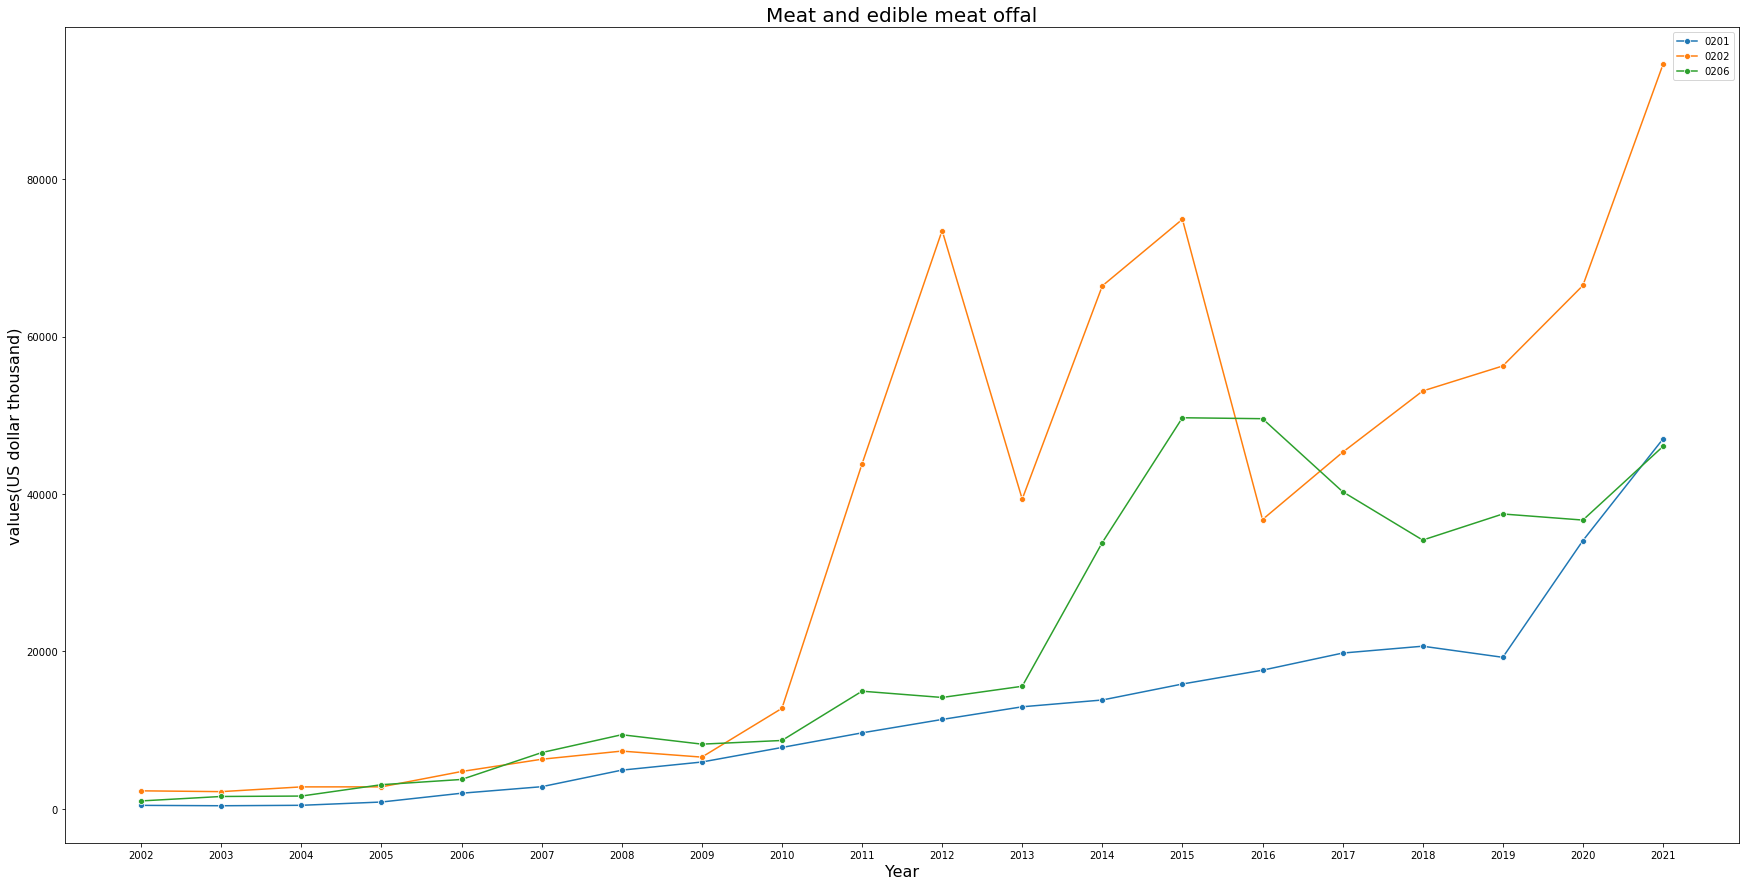

กลุ่มสินค้า(Code):07


,Code,Product label,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
49,0701,"Potatoes, fresh or chilled",3088,8556,8596,7874,7056,8516,15598,15972,...,23098,28232,24057,13046,18964,28028,28655,31823,26336,33573
50,0702,"Tomatoes, fresh or chilled",1,5,32,58,126,183,101,82,...,347,335,303,466,719,448,459,574,323,145
51,0703,"Onions, shallots, garlic, leeks and other alli...",3664,11046,17344,12039,15673,13862,24687,24879,...,33040,34534,29074,48486,34973,45123,62528,85105,76395,51818
52,0704,"Cabbages, cauliflowers, kohlrabi, kale and sim...",80,376,1988,4349,7865,8571,12718,13909,...,40511,45189,43877,50944,60604,58629,56392,69700,64473,69820
53,0705,"""Lettuce """"Lactuca sativa"""" and chicory """"Cich...",3,11,14,159,562,761,990,1136,...,2363,3335,2898,3321,3710,3802,3649,4273,4949,6052
54,0706,"Carrots, turnips, salad beetroot, salsify, cel...",6168,7125,10083,14562,17711,18607,23858,28500,...,44917,47847,42007,45904,46696,40968,47720,46767,51322,59679
55,0707,"Cucumbers and gherkins, fresh or chilled",0,0,1,2,7,5,5,3,...,46,0,1,3,12,2,9,10,5,10
56,0708,"Leguminous vegetables, shelled or unshelled, f...",34,154,245,731,2643,2724,1612,2104,...,4342,3267,2504,2397,2287,2212,2614,2873,3320,3297
57,0709,"""Other vegetables, fresh or chilled (excluding...",387,355,1109,1302,3254,3792,5237,5727,...,17824,30409,34420,40663,53074,69974,74061,86515,100834,123530
58,0710,"Vegetables, uncooked or cooked by steaming or ...",624,609,1230,2640,2967,4878,5744,4539,...,7942,13077,10015,10286,12979,14213,14507,14247,13822,13435


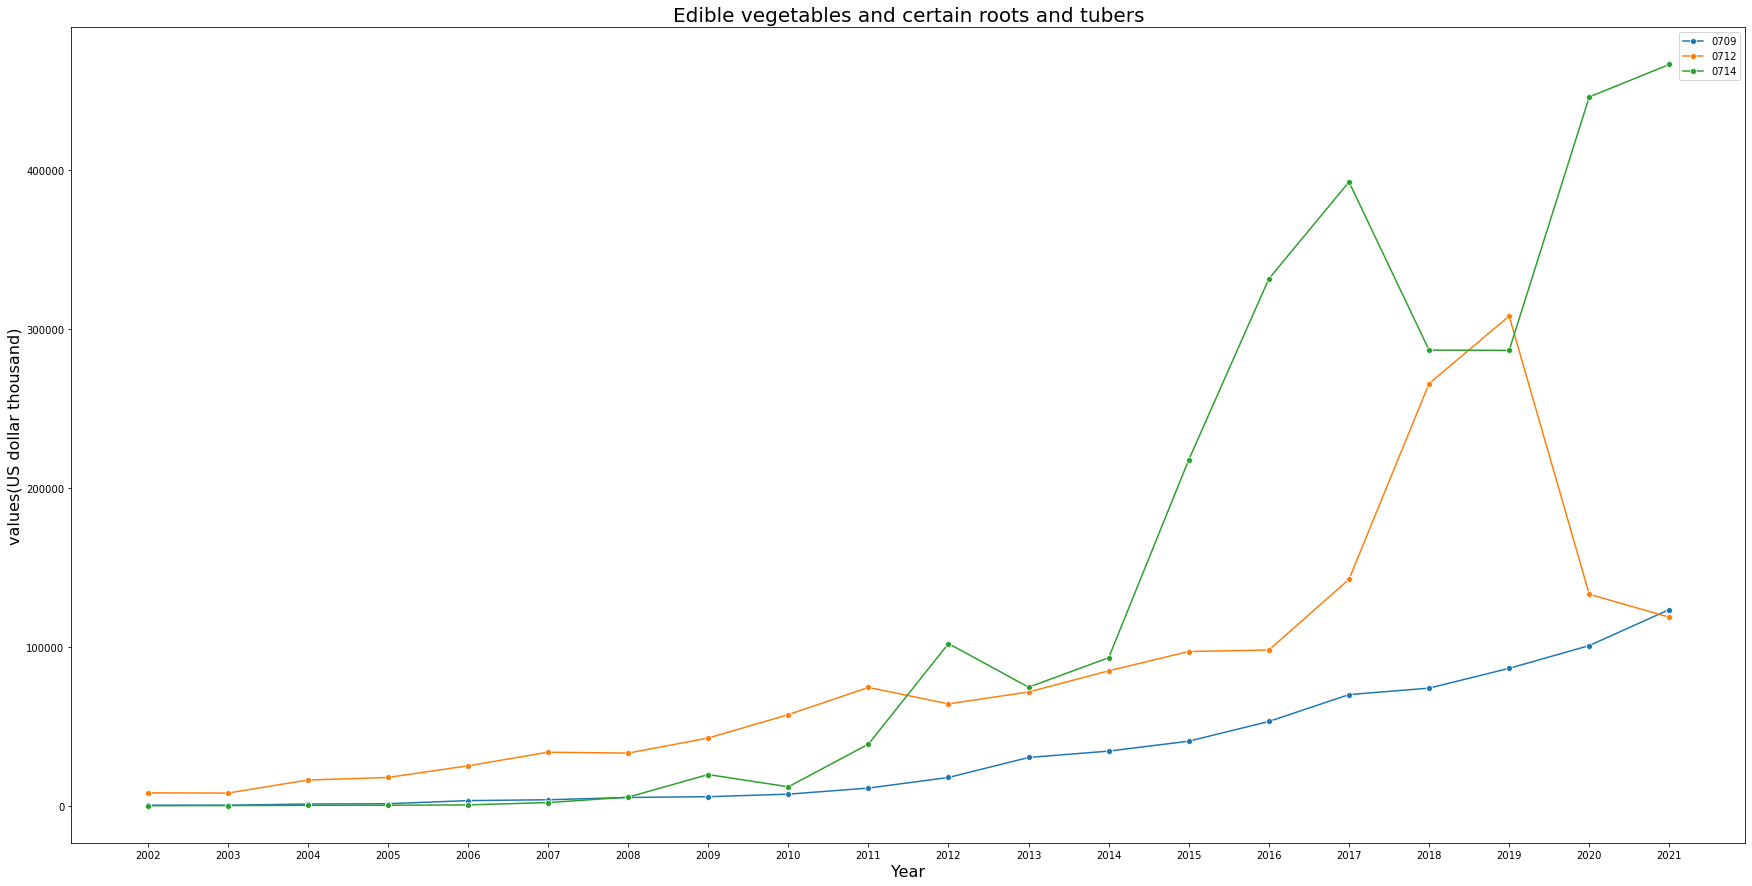

กลุ่มสินค้า(Code):43


,Code,Product label,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
513,4301,"Raw furskins, incl. heads, tails, paws and oth...",0,0,14,0,3,5,0,0,...,172,9,6,60,66261,160309,215585,310491,158686,347178
514,4302,"Tanned or dressed furskins, incl. heads, tails...",5563,4769,6570,10035,3220,1905,7352,333,...,1484,1963,2603,1207,1106,223,9295,10295,8916,11507
515,4303,"Articles of apparel, clothing accessories and ...",390,611,48,52,103,181,156,225,...,864,1466,1588,1330,1180,1392,2016,1183,986,878
516,4304,Artificial fur and articles thereof (excluding...,3732,294,637,1278,921,540,1320,812,...,594,506,486,738,1174,2104,3169,3529,2318,1846


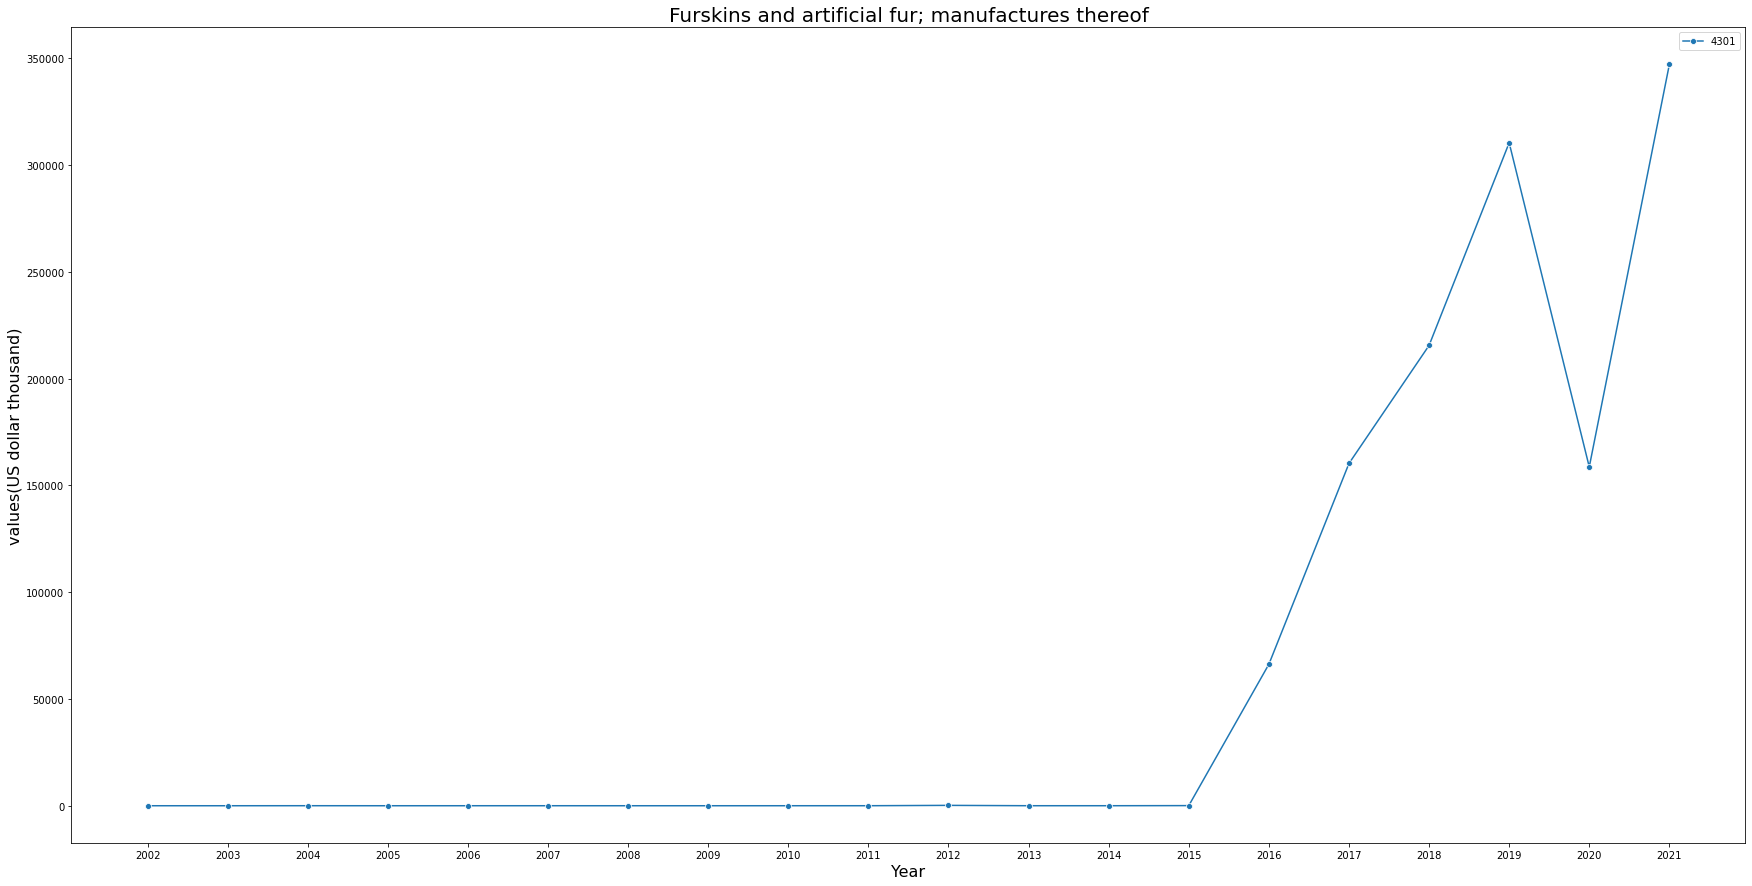

In [129]:
#ทำการ plot กราฟ ในส่วนของ กลุ่มสินค้าที่มีการเปลี่ยนแปลงเพิ่มขึ้นเพื่อดูว่าในกลุ่มสินค้านั้นมีสินค้าอะไรบ้างที่มีการเปลี่ยนแปลงอย่างเห็นได้ชัด
code_increase #ตัวแปรที่่เก็บค่า code ของกลุ่มสินค้าที่เพิ่มขึ้น
code_increase_label #ตัวแปรที่เก็บค่า product label ของกลุ่มที่เพิ่มขึ้น
for i,k in zip(code_increase,code_increase_label):
    print(f'กลุ่มสินค้า(Code):{i}')
    df_for_plot1 = df_value.loc[df_value['Code'].str.contains(f'^{i}', case=False, regex=True)] #'^01' จะใช้ loop ในการ plot
    display(df_for_plot1)
    mean = int(df_for_plot1[df_for_plot1.columns[-1]].mean())#หาค่า mean ของ column สุดท้ายเนื่องจากเป็นปีล่าสุด
    #filter value ที่มากกว่า mean เท่านั้นเนื่องจากกราฟเยอะเกินไปและสินค้าบางชนิดไม่ได้มีมูลค่าที่่สูงพอที่จะน่าสนใจ
    df_for_plot1 = df_for_plot1[ df_for_plot1[df_for_plot1.columns[-1]] >= mean ]
    
    df_for_plot2 = df_for_plot1.loc[:,df_for_plot1.columns != 'Product label']
    df_for_plot2.set_index('Code',inplace= True)
    df_for_plot2 = df_for_plot2.transpose()
    df_for_plot2.index.names = ['Year']

    code4_increase = df_for_plot1.loc[ : , 'Code']

    fig, ax = plt.subplots(figsize=(30, 15))
    plt.title(k, fontsize = 20)
    for j in code4_increase:
        sns.lineplot(data = df_for_plot2, x = 'Year', y = j, marker = "o", label = j)
    plt.xlabel("Year", size=16)
    plt.ylabel("values(US dollar thousand)", size=16)
    plt.legend(loc='best')
    plt.show()

กลุ่มสินค้า(Code):51


,Code,Product label,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
592,5101,"Wool, neither carded nor combed",57336,60761,64238,54476,37893,33538,26873,16672,...,2911,21926,37388,32965,34437,39105,44922,34271,15880,19917
593,5102,"Fine or coarse animal hair, neither carded nor...",46,5,2,13,10,68,76,146,...,0,0,0,0,1,1,335,397,0,0
594,5103,Waste of wool or of fine or coarse animal hair...,0,0,2,34,64,29,242,39,...,73,66,171,0,3,74,53,89,102,92
595,5104,Garnetted stock of wool or of fine or coarse a...,0,0,0,24,51,37,92,69,...,0,0,0,0,0,0,0,0,1,0
596,5105,"Wool and fine or coarse animal hair, carded or...",2812,2535,6436,4476,6071,6287,11202,4642,...,16853,17471,12741,9832,10474,4032,7726,7972,5031,10664
597,5106,Carded wool yarn (excluding that put up for re...,5425,8175,8531,6420,6932,6923,7480,4575,...,13717,13860,12988,12634,14803,16619,17975,24466,12862,13740
598,5107,Yarn of combed wool (excluding that put up for...,26325,25968,23643,7070,6903,4740,7023,5769,...,13619,19317,12114,9656,12545,11135,16987,20092,15528,12786
599,5108,Carded or combed yarn of fine animal hair (exc...,343,211,580,279,326,169,110,147,...,161,165,561,232,206,2082,1022,660,3192,1117
600,5109,"Yarn of wool or fine animal hair, put up for r...",283,162,207,569,529,246,482,520,...,1130,4080,5135,551,3955,7260,7029,6986,5726,4438
601,5110,"Yarn of coarse animal hair or of horsehair, in...",0,1,4,0,1,1,4,0,...,2,17,0,43,103,58,1,2,191,0


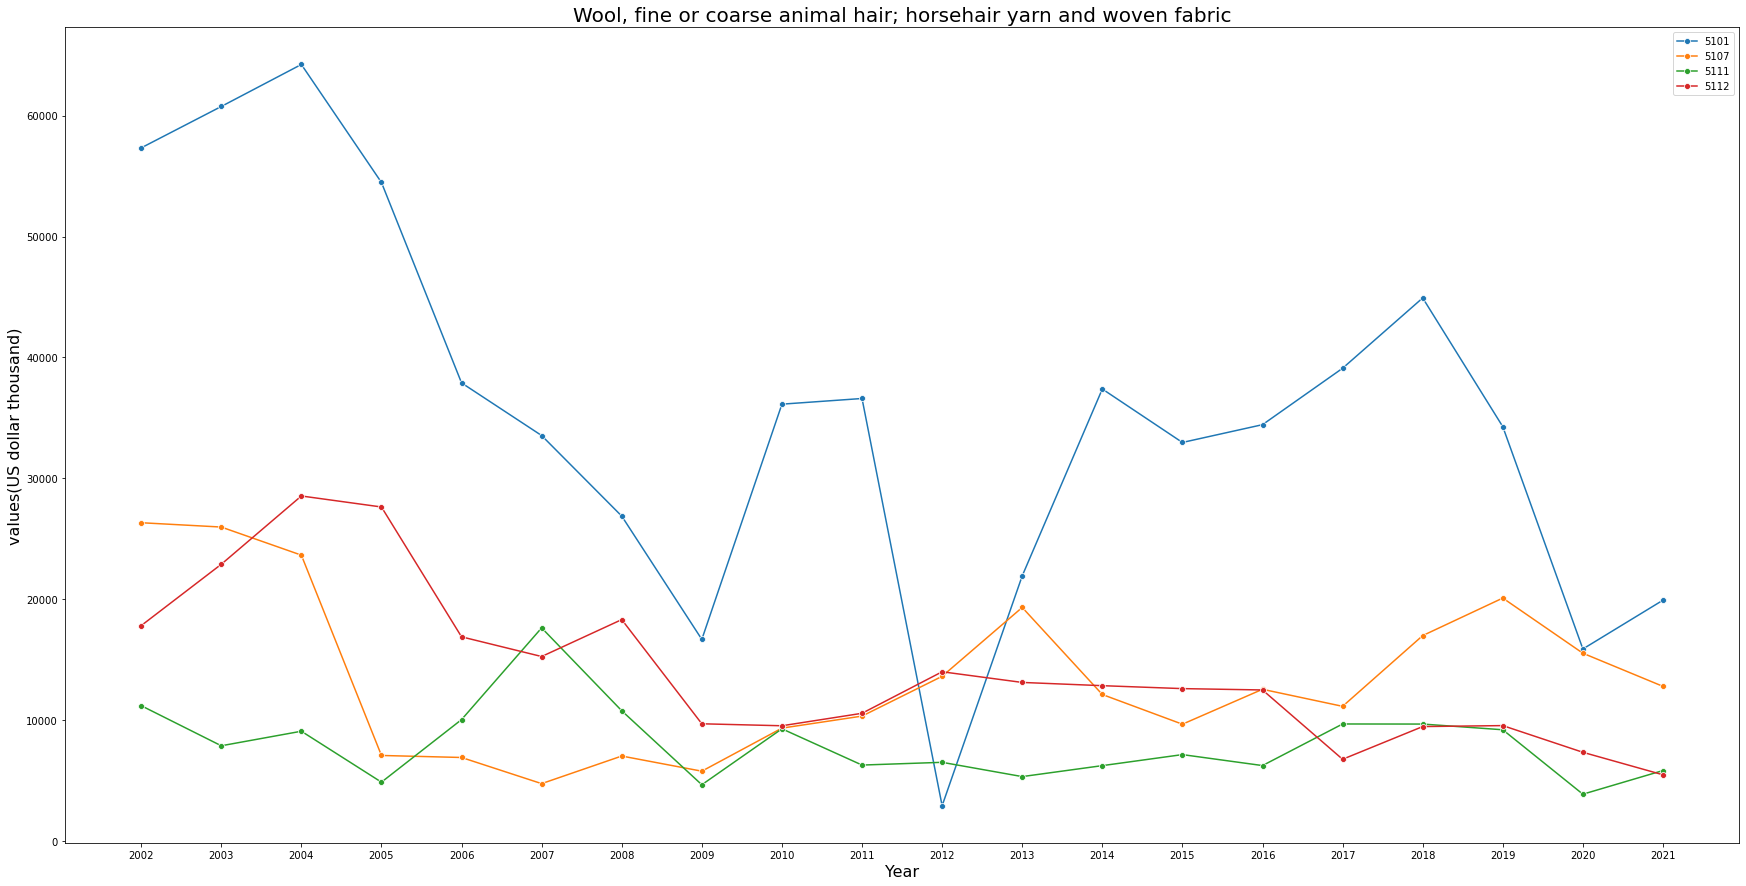

กลุ่มสินค้า(Code):50


,Code,Product label,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
585,5001,Silkworm cocoons suitable for reeling,46,0,204,424,359,62,1749,162,...,381,452,398,138,124,0,0,0,0,0
586,5002,"""Raw silk """"non-thrown""""""",825,360,1706,2644,1362,767,1310,752,...,232,158,134,158,78,115,134,0,0,0
587,5003,"Silk waste, incl. cocoons unsuitable for reeli...",3860,2200,1916,3321,6379,4588,3442,813,...,1744,2334,3571,2063,2397,2404,4536,3623,1661,1825
588,5004,Silk yarn (excluding that spun from silk waste...,3729,5213,9249,9968,6482,5004,7813,2511,...,6223,8634,2576,2567,3805,3997,4937,3492,1055,1363
589,5005,Yarn spun from silk waste (excluding that put ...,15,268,1610,1170,2552,913,1738,291,...,225,265,359,282,284,370,294,532,394,782
590,5006,"Silk yarn and yarn spun from silk waste, put u...",9,13,51,49,29,49,95,61,...,63,21,21,6,104,141,151,404,520,252
591,5007,Woven fabrics of silk or of silk waste,1289,2745,5661,4588,3625,4428,4666,3972,...,3117,3223,2816,2340,2311,2720,3143,2750,1112,2006


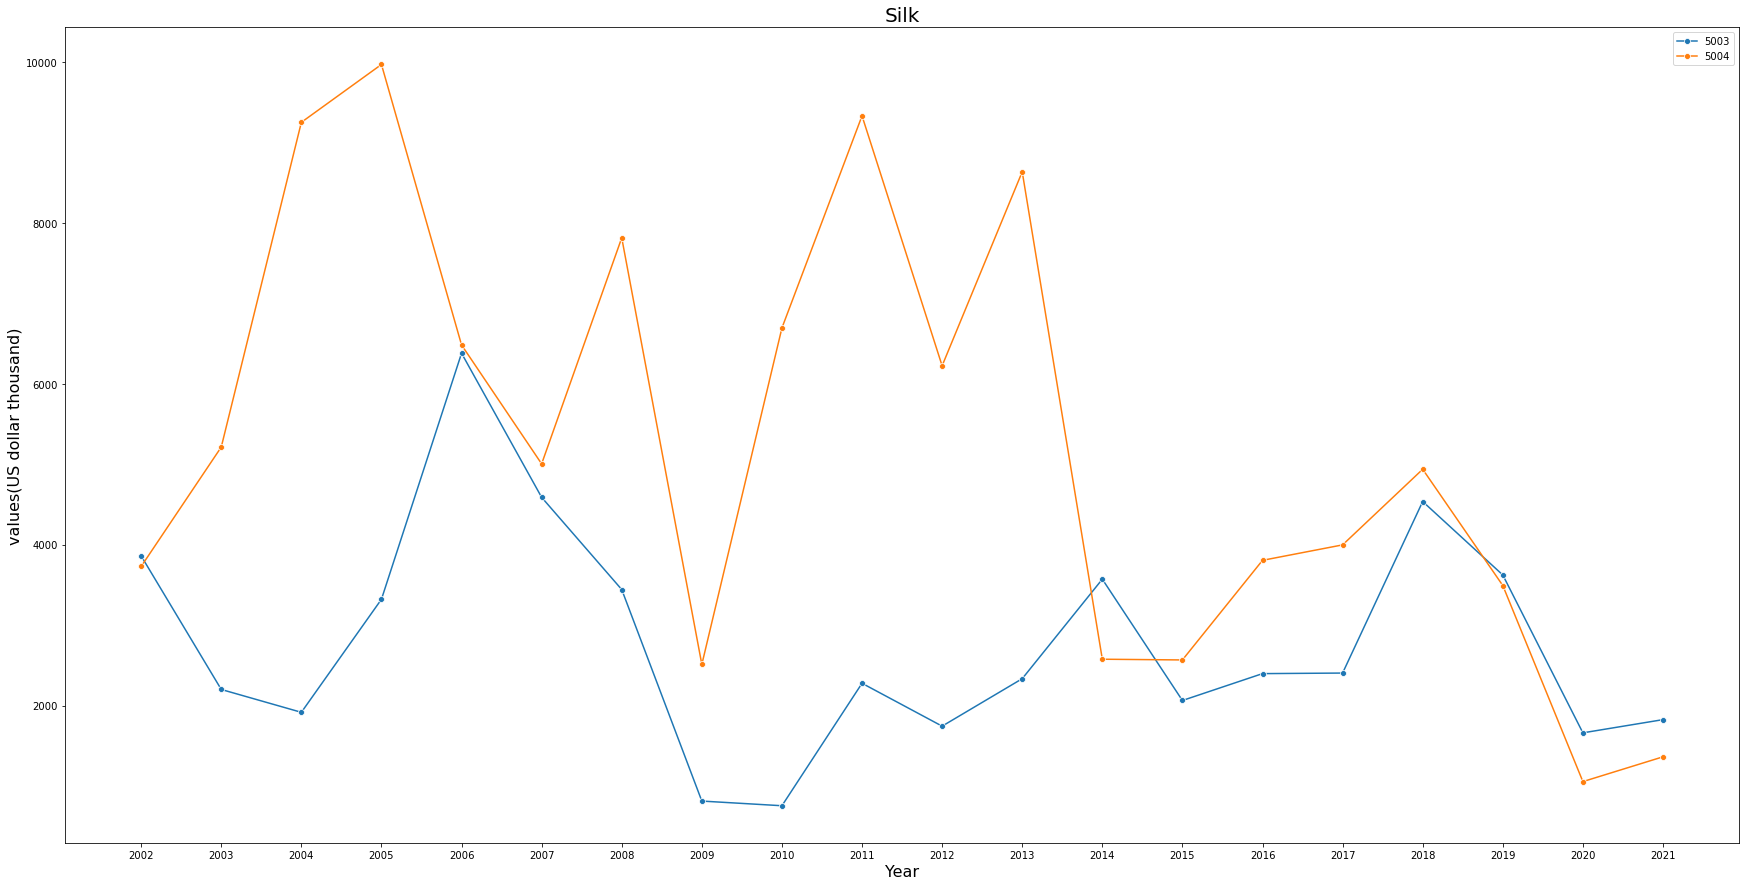

กลุ่มสินค้า(Code):52


,Code,Product label,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
605,5201,"Cotton, neither carded nor combed",461891,526519,552307,612167,569935,536240,722596,484593,...,748886,734188,676267,530740,433387,491705,523308,394667,220279,324236
606,5202,"Cotton waste, incl. yarn waste and garnetted s...",2197,2250,4594,3883,1443,4183,11333,3197,...,75011,15255,12222,18527,10906,17778,14920,8405,8378,10545
607,5203,"Cotton, carded or combed",2209,1756,703,706,54,57,608,996,...,3219,987,1051,559,123,629,2465,2474,1255,846
608,5204,"Cotton sewing thread, whether or not put up fo...",5740,3786,4096,10626,4313,3004,3268,3959,...,1595,2480,920,515,699,464,482,720,672,220
609,5205,"Cotton yarn other than sewing thread, containi...",57254,51608,51430,44435,45321,36932,42265,29920,...,63170,56754,57408,58322,79251,90624,110486,118243,87464,73142
610,5206,"Cotton yarn containing predominantly, but < 85...",5797,6760,8316,7474,6729,6802,8055,6287,...,13522,18736,18684,15523,17688,17442,18040,22536,18120,19323
611,5207,Cotton yarn put up for retail sale (excluding ...,290,329,743,582,1458,1977,2567,1516,...,1289,1164,1102,1178,1117,635,631,515,411,475
612,5208,"Woven fabrics of cotton, containing >= 85% cot...",111396,126286,131883,152619,163906,174835,198381,135423,...,180303,154617,141549,119421,123686,110338,129744,116510,89027,83239
613,5209,"Woven fabrics of cotton, containing >= 85% cot...",62345,67962,73675,83333,61232,53378,47908,30916,...,27329,25745,27276,26609,29346,22370,32865,32103,27619,34385
614,5210,"Woven fabrics of cotton, containing predominan...",33160,38980,40571,30249,27128,26240,27988,15517,...,12552,16976,14357,11450,27837,9936,11483,12766,7435,10130


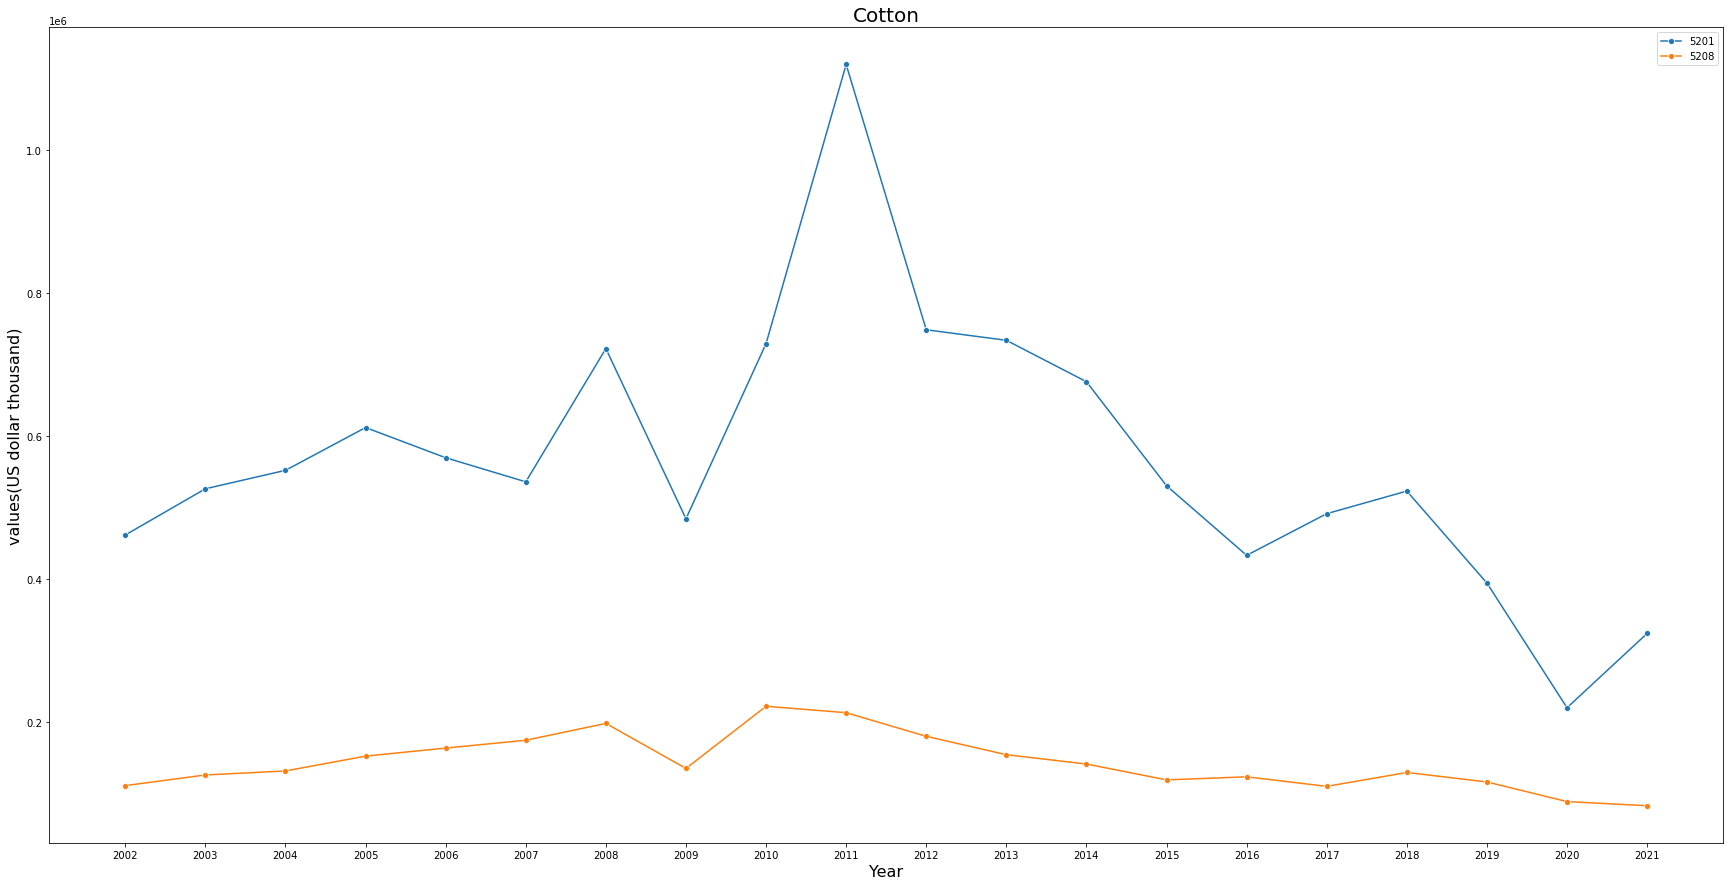

In [130]:
#ทำการ plot กราฟ ในส่วนของกลุ่มสินค้าที่มีการเปลี่ยนแปลงลดลงเพื่อดูว่าในกลุ่มสินค้านั้นมีสินค้าอะไรบ้างที่มีการเปลี่ยนแปลงอย่างเห็นได้ชัด
code_decrease #ตัวแปรที่่เก็บค่า code ของกลุ่มสินค้าที่ลดลง
code_decrease_label #ตัวแปรที่เก็บค่า product label ของกลุ่มที่ลดลง
for i,k in zip(code_decrease,code_decrease_label):
    print(f'กลุ่มสินค้า(Code):{i}')
    df_for_plot1 = df_value.loc[df_value['Code'].str.contains(f'^{i}', case=False, regex=True)] #'^01' จะใช้ loop ในการ plot
    display(df_for_plot1)
    mean = int(df_for_plot1[df_for_plot1.columns[2]].mean())#หาค่า mean ของ column สุดท้ายเนื่องจากเป็นปีล่าสุด
    df_for_plot1 = df_for_plot1[ df_for_plot1[df_for_plot1.columns[2]] >= mean ] #filter value ที่มากกว่า mean เท่านั้นเนื่องจากกราฟเยอะเกินไปและสินค้าบางชนิดไม่ได้มีมูลค่าที่่สูงพอที่จะน่าสนใจ
    df_for_plot2 = df_for_plot1.loc[:,df_for_plot1.columns != 'Product label']
    df_for_plot2.set_index('Code',inplace= True)
    df_for_plot2 = df_for_plot2.transpose()
    df_for_plot2.index.names = ['Year']
    
    code4_decrease = df_for_plot1.loc[ : , 'Code']

    fig, ax = plt.subplots(figsize=(30, 15))
    plt.title(k, fontsize = 20)
    for j in code4_decrease:
        sns.lineplot(data = df_for_plot2, x = 'Year', y = j, marker = "o", label = j)
    plt.xlabel("Year", size=16)
    plt.ylabel("values(US dollar thousand)", size=16)
    plt.legend(loc='best')
    plt.show()

In [131]:
#สินค้ากลุ่มใดมีสัดส่วนในการนำเข้ามากที่สุด 5 อันดับแรก โดยเฉลี่ย 5 ปีย้อนหลัง
#สินค้ากลุ่มนั้นนั้นคิดเป็นมูลค่าการนำเข้าเท่าไร
df_ratio_2digit
df_ratio_5year = df_ratio_2digit.loc[:,['Code','Product label','2017','2018','2019','2020','2021']]
#ทำการ drop ข้อมูลในส่วนของ Commodities not elsewhere specific ออก
df_ratio_5year = df_ratio_5year.drop(df_ratio_5year.index[len(df_ratio_5year)-1])

#หาค่าเฉลี่ยของสัดส่วนมูลค่าการนำเข้า 5 ปีย้อนหลัง
df_ratio_5year = df_ratio_5year.sort_values(['Code'],ascending=True)
df_ratio_5year = df_ratio_5year.groupby('Code')[['2017','2018','2019','2020','2021']].sum() #หาผลรวม column ของสินค้ากลุ่มเดียวกัน
df_ratio_5year['5 years mean(ratio)'] = df_ratio_5year.agg( ['mean'], axis=1 ).sort_values(['mean'],ascending=False)
df_ratio_5year_mean = df_ratio_5year.loc[:,'5 years mean(ratio)']

#ทำการ join ข้อมูลเพื่อให้รู้ว่า สินค้าที่มีสัดส่วนเฉลี่ยมีอะไรบ้าง
df_ratio_5year_mean_product = pd.merge(df_group_name,df_ratio_5year_mean,left_on='Code',right_on='Code',how='right')
df_ratio_5year_mean_product = df_ratio_5year_mean_product.sort_values(['5 years mean(ratio)'],ascending=False) #sort value มากไปน้อย


#ทำการหามูลค่าการนำเข้าสินค้า 5 อันดับแรก โดยเฉลี่ย 5 ปีย้อนหลัง
#ทำการ group dataframe df_value_2digit ด้วย Code
df_value_5year = df_value_2digit.groupby('Code')[['2017','2018','2019','2020','2021']].sum()
df_value_5year['5 years mean(US dollar thousand)'] = df_value_5year.agg( ['mean'], axis=1 ).sort_values(['mean'],ascending=False)
df_value_5year_mean = df_value_5year.loc[:,['5 years mean(US dollar thousand)']]

#ทำการรวม dataframe df_ratio_5year_mean_product_top5 เข้ากับ df_value_5year_mean เพื่อดูมูลค่าเฉลี่ยของสินค้านั้น
df_ratio_value_5year_mean = pd.merge(df_ratio_5year_mean_product,df_value_5year_mean,left_on='Code',right_on='Code',how='left')
df_ratio_value_5year_mean_top5 = df_ratio_value_5year_mean.head(5) #เลือกกลุ่มที่มีมูลค่าการนำเข้าสูงสุด 5 อันดับ
display(df_ratio_value_5year_mean_top5)

#เก็บค่าตัวแปร
code_5high = df_ratio_value_5year_mean_top5.loc[ : , 'Code'] #เก็บ code ของกลุ่มที่เพิ่มขึ้น
code_5high_label = df_ratio_value_5year_mean_top5.loc[ : , 'Product label'] #เก็บ product label ของกลุ่มที่เพิ่มขึ้น


,Code,Product label,5 years mean(ratio),5 years mean(US dollar thousand)
0,85,Electrical machinery and equipment and parts t...,19.119650,45572908.4
1,27,"Mineral fuels, mineral oils and products of th...",15.185926,36435056.8
2,84,"Machinery, mechanical appliances, nuclear reac...",11.988411,28541446.6
3,71,"Natural or cultured pearls, precious or semi-p...",5.349336,12805070.0
4,72,Iron and steel,4.979453,11970993.6


กลุ่มสินค้า(Code):85


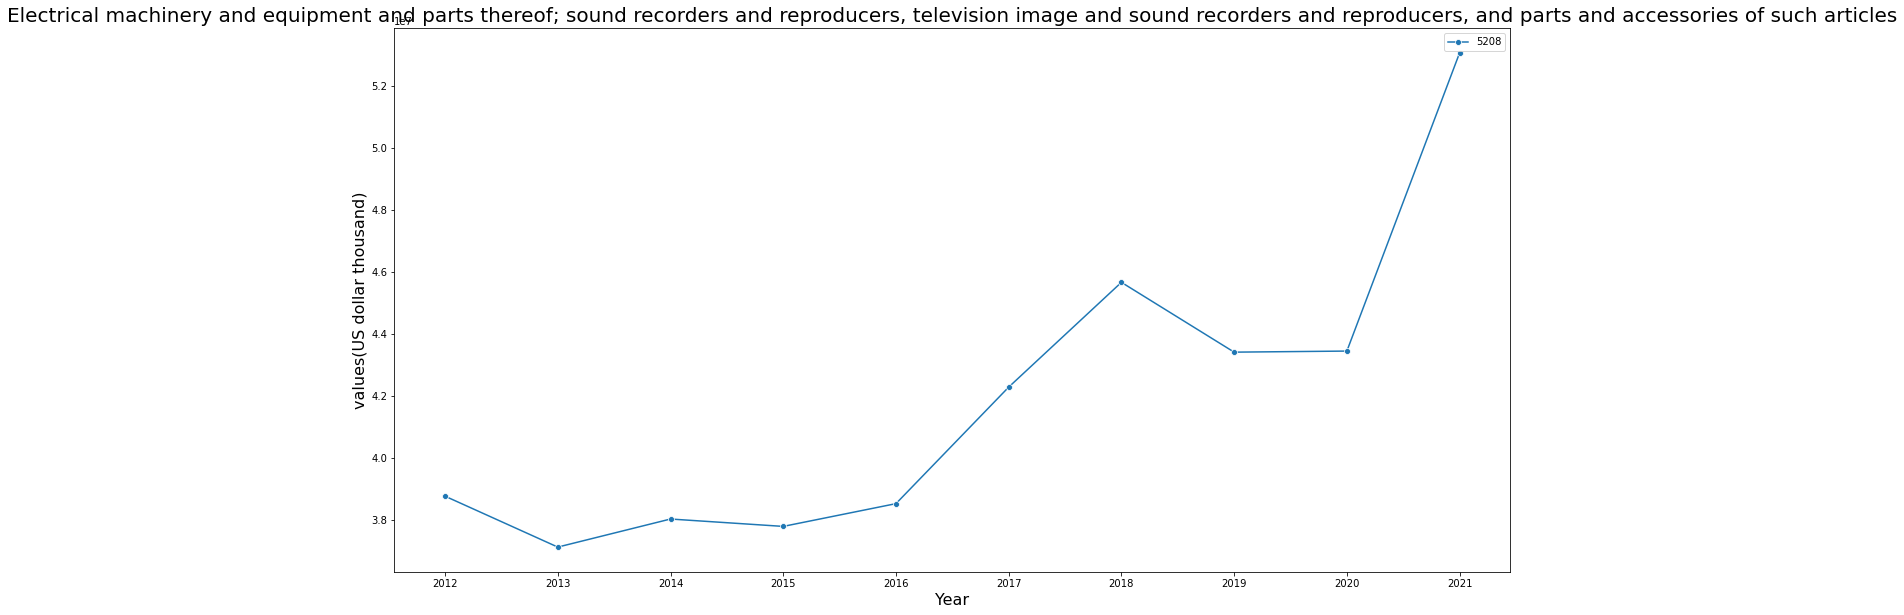

กลุ่มสินค้า(Code):27


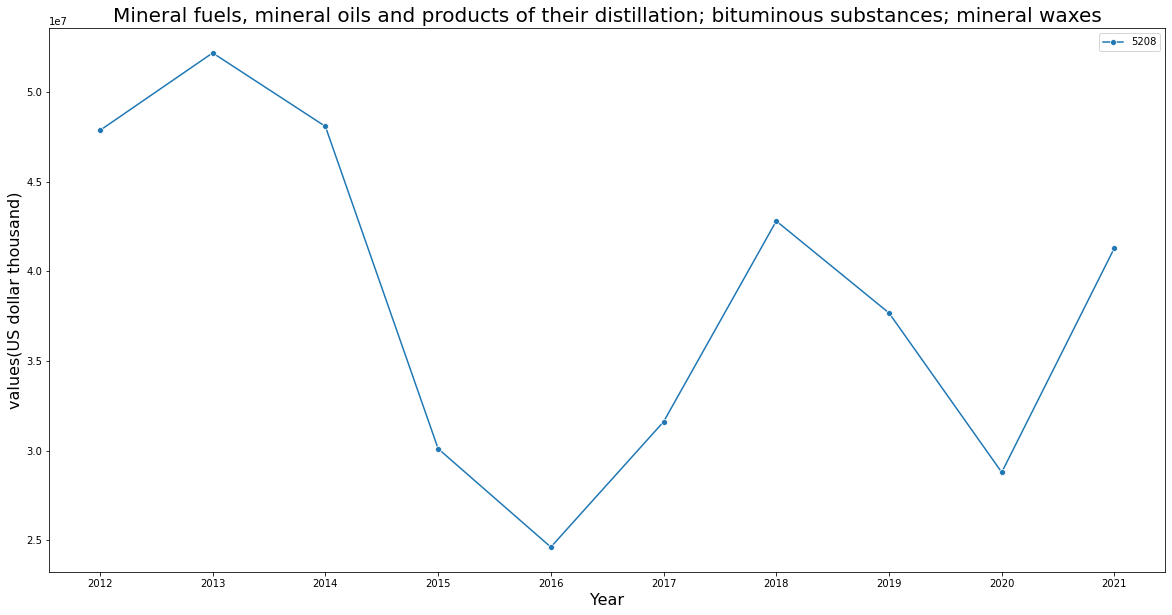

กลุ่มสินค้า(Code):84


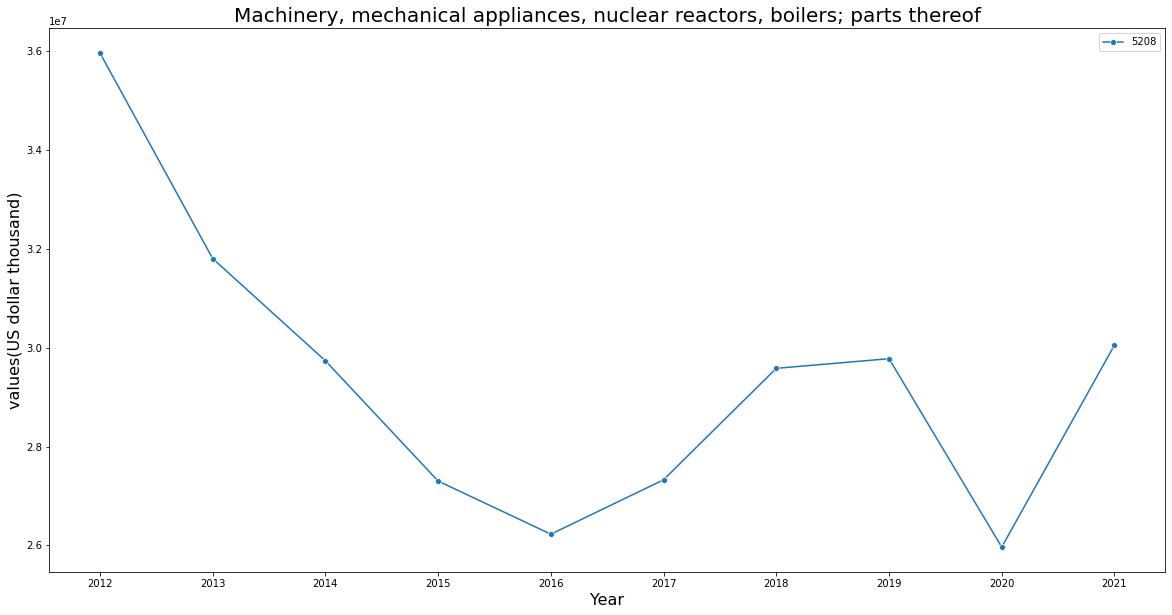

กลุ่มสินค้า(Code):71


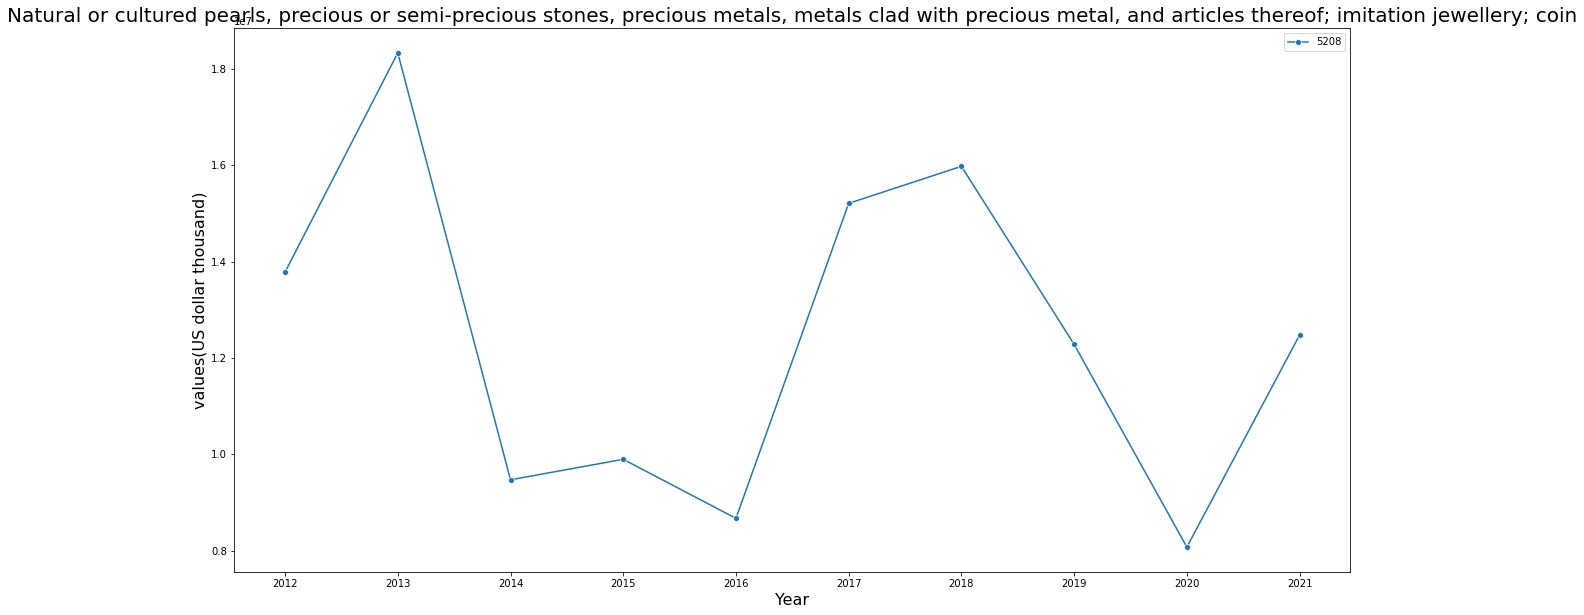

กลุ่มสินค้า(Code):72


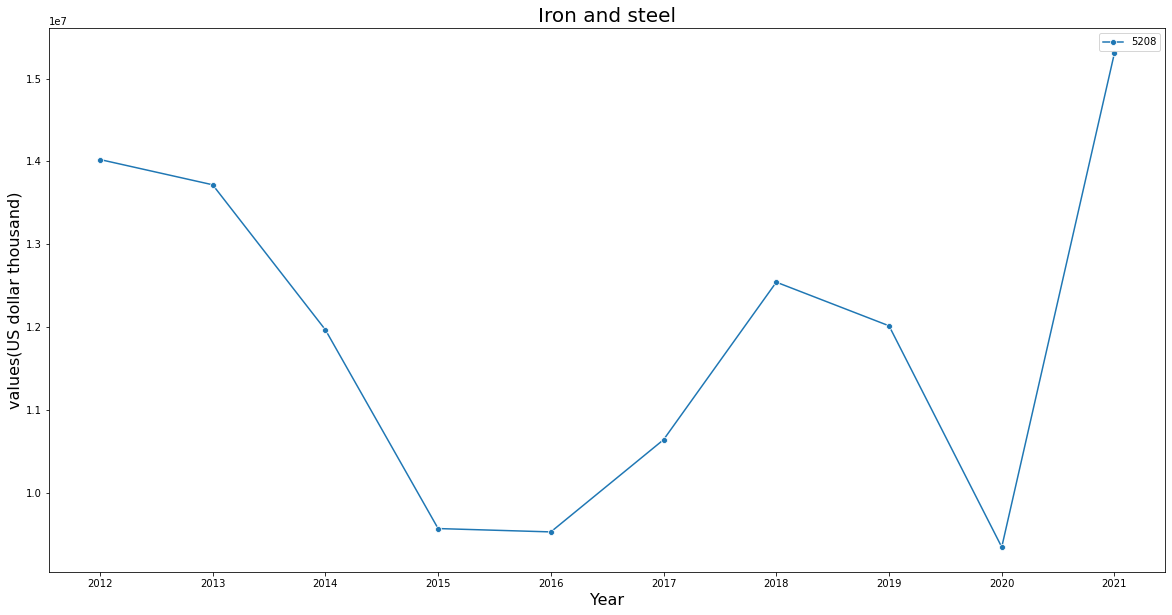

In [132]:
#plot กราฟเพื่อดูเทรนขของสินค้า 5 กลุ่มนี้

for i,k in zip(code_5high,code_5high_label):
    print(f'กลุ่มสินค้า(Code):{i}')
    df_for_plot1 = df_value_2digit.loc[df_value_2digit['Code'].str.contains(f'^{i}', case=False, regex=True)] #'^01' จะใช้ loop ในการ plot
    df_for_plot1 = df_for_plot1.loc[:,['Code','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']]
    df_for_plot1 = df_for_plot1.groupby('Code').sum()
    
    df_for_plot2 = df_for_plot1.loc[:,df_for_plot1.columns != 'Product label']
    df_for_plot2 = df_for_plot2.transpose()
    df_for_plot2.index.names = ['Year']

    fig, ax = plt.subplots(figsize=(20, 10))
    plt.title(k, fontsize = 20)
    sns.lineplot(data = df_for_plot2, x = 'Year', y = i, marker = "o", label = j)
    plt.xlabel("Year", size=16)
    plt.ylabel("values(US dollar thousand)", size=16)
    plt.legend(loc='best')
    plt.show()
